## MLB Home Run Projections Model: Linear Regression, Simple Model
This model tries to estimate the next season's home run count per player by using a simple Linear Regression model.

In [130]:
#import packages for DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#initialize Dataframe and combine all .csv files into one Dataframe.
# Combine the .csv files using concat.
df = pd.DataFrame()

df = pd.concat(
    map(pd.read_csv, ['2019stats.csv', '2021stats.csv', '2022stats.csv', '2023stats.csv']), ignore_index = True)

In [132]:
#checking format of data
df.head(10)

,"last_name, first_name",player_id,year,ab,pa,hit,single,double,triple,home_run,strikeout,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,b_rbi
0,"Suarez, Eugenio",553993,2019,575,662,156,83,22,2,49,189,28.5,10.6,0.271,0.572,0.358,103
1,"Freeman, Freddie",518692,2019,597,692,176,102,34,2,38,127,18.4,12.6,0.295,0.549,0.389,121
2,"Segura, Jean",516416,2019,576,618,161,108,37,4,12,73,11.8,4.9,0.280,0.420,0.323,60
3,"Ozuna, Marcell",542303,2019,485,549,117,64,23,1,29,114,20.8,11.3,0.241,0.472,0.328,89
4,"Torres, Gleyber",650402,2019,546,604,152,88,26,0,38,129,21.4,7.9,0.278,0.535,0.337,90
5,"Arenado, Nolan",571448,2019,588,662,185,111,31,2,41,93,14.0,9.4,0.315,0.583,0.379,118
6,"Yelich, Christian",592885,2019,489,580,161,85,29,3,44,118,20.3,13.8,0.329,0.671,0.429,97
7,"Rosario, Amed",642708,2019,616,655,177,125,30,7,15,124,18.9,4.7,0.287,0.432,0.323,72
8,"Devers, Rafael",646240,2019,647,702,201,111,54,4,32,119,17.0,6.8,0.311,0.555,0.361,115
9,"Swanson, Dansby",621020,2019,483,545,121,75,26,3,17,124,22.8,9.4,0.251,0.422,0.325,65


In [133]:
#rename 'last_name, first_name' column to simplify for naming purposes
df = df.rename(columns={'last_name, first_name': 'name'})
df.head(10)

,name,player_id,year,ab,pa,hit,single,double,triple,home_run,strikeout,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,b_rbi
0,"Suarez, Eugenio",553993,2019,575,662,156,83,22,2,49,189,28.5,10.6,0.271,0.572,0.358,103
1,"Freeman, Freddie",518692,2019,597,692,176,102,34,2,38,127,18.4,12.6,0.295,0.549,0.389,121
2,"Segura, Jean",516416,2019,576,618,161,108,37,4,12,73,11.8,4.9,0.280,0.420,0.323,60
3,"Ozuna, Marcell",542303,2019,485,549,117,64,23,1,29,114,20.8,11.3,0.241,0.472,0.328,89
4,"Torres, Gleyber",650402,2019,546,604,152,88,26,0,38,129,21.4,7.9,0.278,0.535,0.337,90
5,"Arenado, Nolan",571448,2019,588,662,185,111,31,2,41,93,14.0,9.4,0.315,0.583,0.379,118
6,"Yelich, Christian",592885,2019,489,580,161,85,29,3,44,118,20.3,13.8,0.329,0.671,0.429,97
7,"Rosario, Amed",642708,2019,616,655,177,125,30,7,15,124,18.9,4.7,0.287,0.432,0.323,72
8,"Devers, Rafael",646240,2019,647,702,201,111,54,4,32,119,17.0,6.8,0.311,0.555,0.361,115
9,"Swanson, Dansby",621020,2019,483,545,121,75,26,3,17,124,22.8,9.4,0.251,0.422,0.325,65


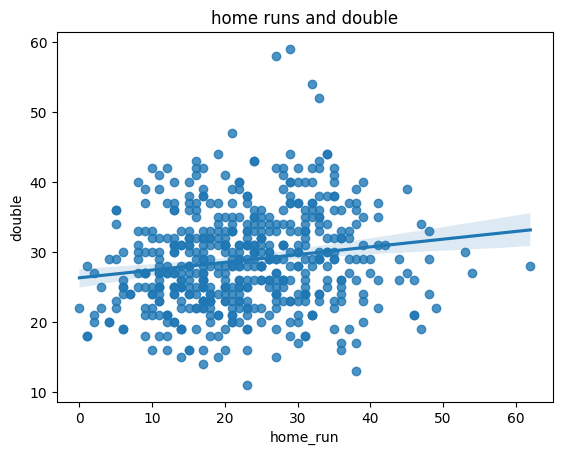

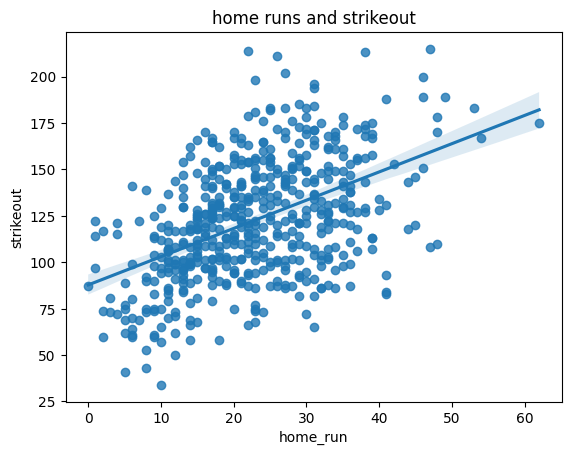

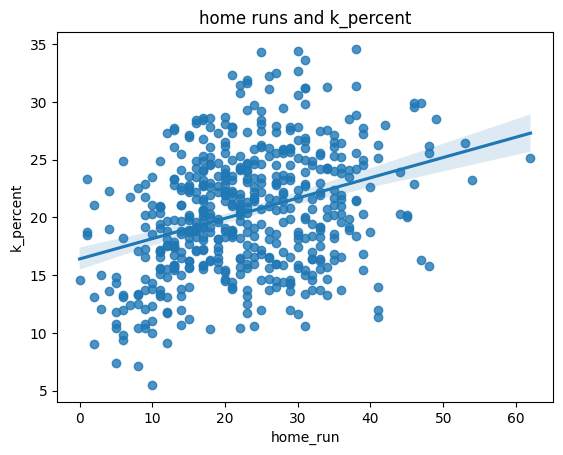

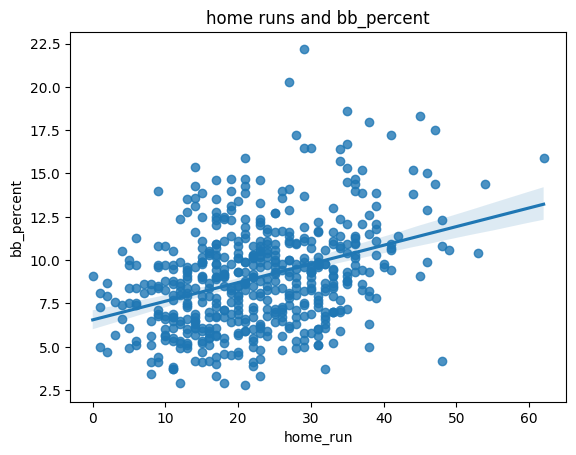

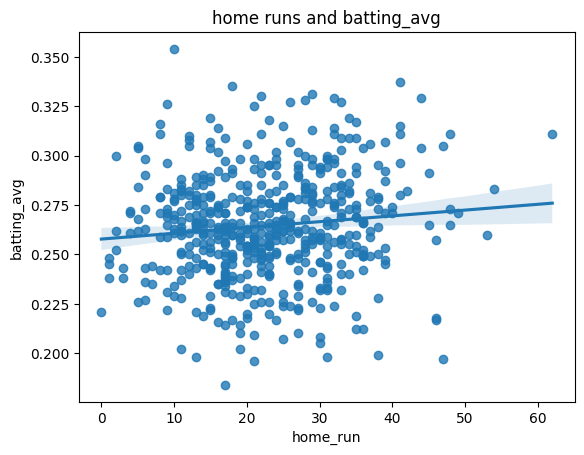

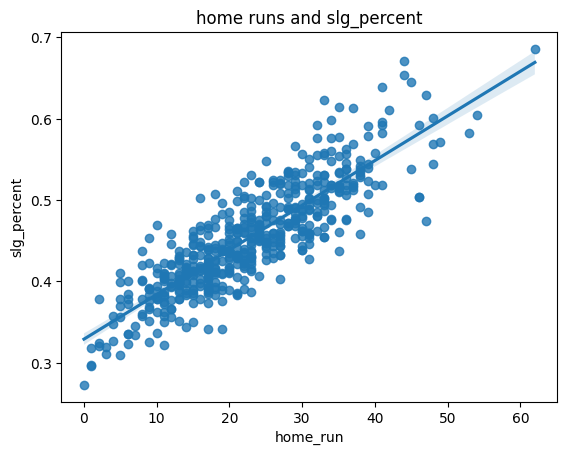

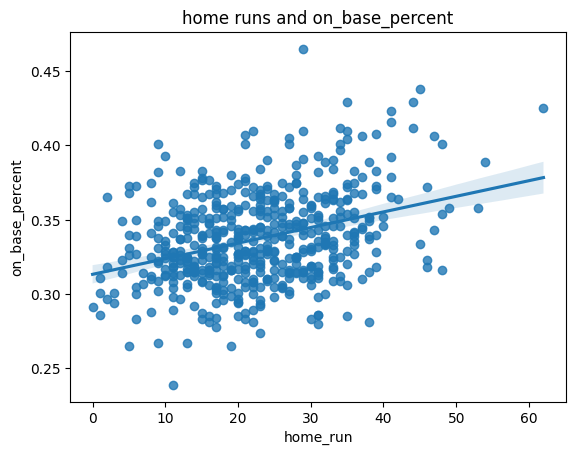

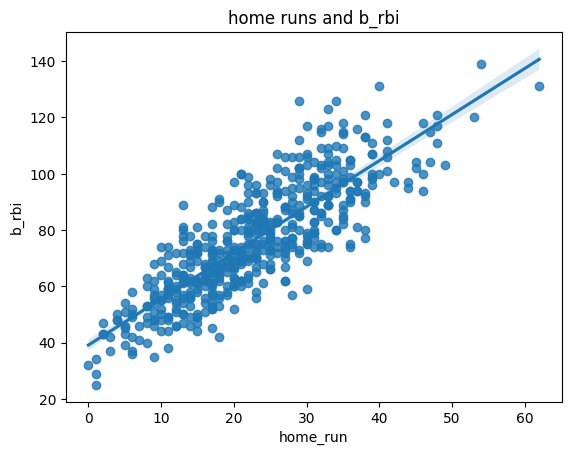

In [134]:
#want to find what correlates with home_runs
for y in ['double', 'strikeout', 'k_percent', 'bb_percent', 'batting_avg', 'slg_percent', 'on_base_percent', 'b_rbi']:
    sns.regplot(data=df, x='home_run', y=y)
    plt.title(f"home runs and {y}")
    plt.show()

In this data, we find that k_percent, strikeouts, slg_perfect, and b_rbi correlate will with home runs, while bb_percent, doubles, on_base_percent, and batting_avg do not correlate as well.

In [135]:
#make copy of hitter DataFrame
_df = df.copy()

#add 1 to year
_df['year'] = _df['year'].add(1)

#create new DataFrame and merge, give new suffixes for previous years
new_hitter_df = (df.merge(_df, on=['year', 'player_id', 'name'], 
                            suffixes=('', '_prev'),
                            how='left'))

#check formatting and give sample of 10
new_hitter_df.sample(10)

,name,player_id,year,ab,pa,hit,single,double,triple,home_run,...,double_prev,triple_prev,home_run_prev,strikeout_prev,k_percent_prev,bb_percent_prev,batting_avg_prev,slg_percent_prev,on_base_percent_prev,b_rbi_prev
318,"Realmuto, J.T.",592663,2022,504,562,139,86,26,5,22,...,25.0,4.0,17.0,129.0,24.0,8.9,0.263,0.439,0.343,73.0
170,"Bogaerts, Xander",593428,2021,529,603,156,98,34,1,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,"Alvarez, Yordan",670541,2022,470,561,144,76,29,2,37,...,35.0,1.0,33.0,145.0,24.2,8.4,0.277,0.531,0.346,104.0
345,"Bogaerts, Xander",593428,2022,557,631,171,118,38,0,15,...,34.0,1.0,23.0,113.0,18.7,10.3,0.295,0.493,0.370,79.0
330,"Winker, Jesse",608385,2022,456,547,100,71,15,0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,"Turner, Trea",607208,2021,595,646,195,130,34,3,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,"Ramirez, Jose",608070,2023,611,691,172,107,36,5,24,...,44.0,5.0,29.0,82.0,12.0,10.1,0.280,0.514,0.355,126.0
26,"Grichuk, Randal",545341,2019,586,628,136,71,29,5,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,"Cruz Jr., Nelson",443558,2021,513,584,136,82,21,1,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,"Garcia, Adolis",666969,2021,581,622,141,82,26,2,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


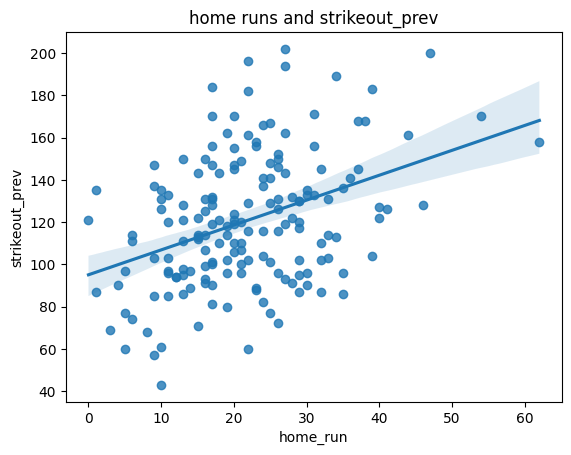

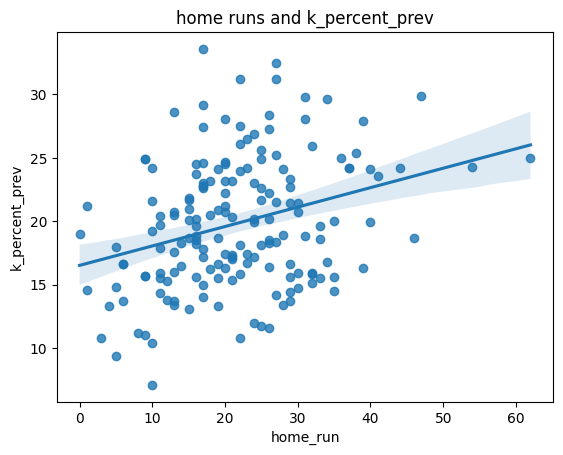

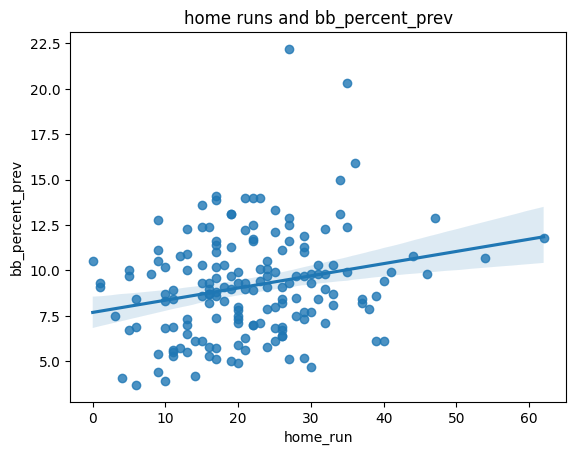

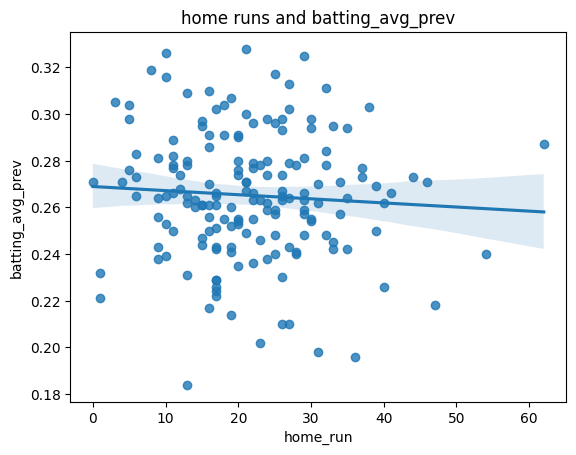

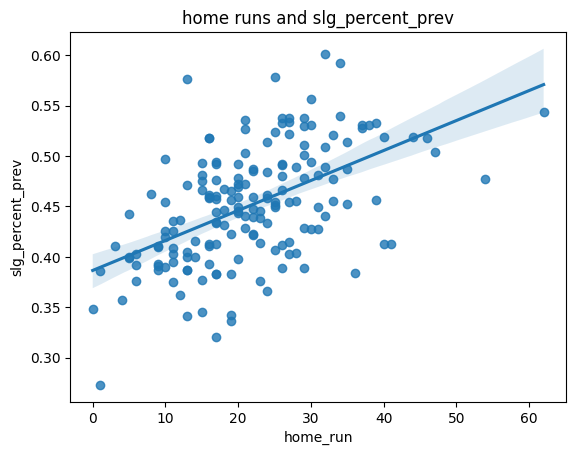

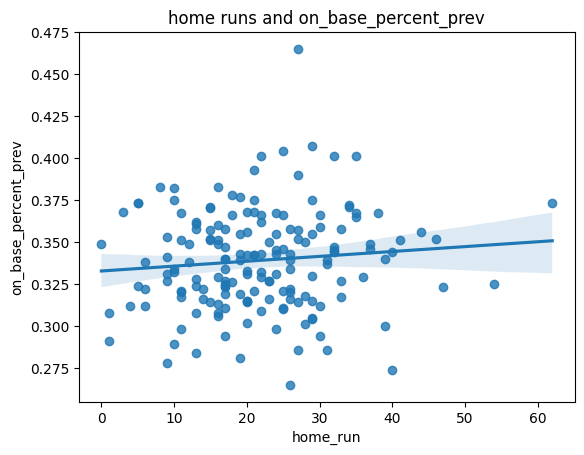

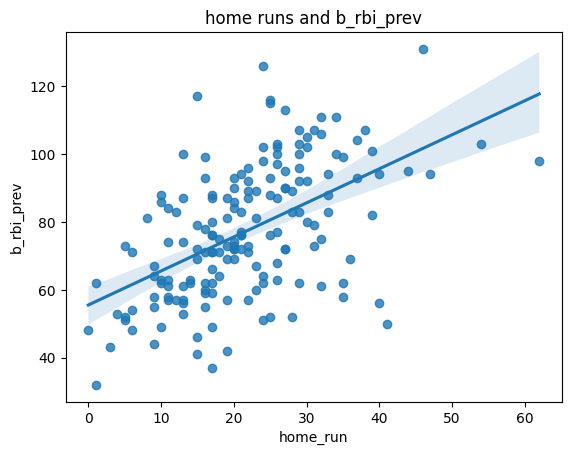

In [136]:
#need to see what correlates with next year's home runs
for y in ['strikeout_prev', 'k_percent_prev', 'bb_percent_prev', 'batting_avg_prev', 'slg_percent_prev', 'on_base_percent_prev', 'b_rbi_prev']:
    sns.regplot(data=new_hitter_df, x='home_run', y=y)
    plt.title(f"home runs and {y}")
    plt.show()

Here, we find that the best correlation between current year home runs and previous year stats would be with batting_avg_prev, on_base_percent_prev, k_percent_prev bb_percent_prev, and slg_percent_prev.

In [137]:
#load in packages for model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#print sample of 10 to check formatting and look at data 
new_hitter_df.sample(10)

,name,player_id,year,ab,pa,hit,single,double,triple,home_run,...,double_prev,triple_prev,home_run_prev,strikeout_prev,k_percent_prev,bb_percent_prev,batting_avg_prev,slg_percent_prev,on_base_percent_prev,b_rbi_prev
189,"Devers, Rafael",646240,2021,591,664,165,89,37,1,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,"Lowe, Nathaniel",663993,2021,557,642,147,102,24,3,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,"Peralta, David",444482,2021,487,538,126,80,30,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,"Soto, Juan",665742,2023,568,708,156,88,32,1,35,...,25.0,2.0,27.0,96.0,14.5,20.3,0.242,0.452,0.401,62.0
363,"Yelich, Christian",592885,2022,575,671,145,102,25,4,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,"Donaldson, Josh",518626,2019,549,659,142,72,33,0,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,"Baez, Javier",595879,2023,510,547,113,82,18,4,9,...,27.0,4.0,17.0,147.0,24.9,4.4,0.238,0.393,0.278,67.0
281,"Kiner-Falefa, Isiah",643396,2022,483,531,126,102,20,0,4,...,25.0,3.0,8.0,90.0,13.3,4.1,0.271,0.357,0.312,53.0
401,"Hernandez, Enrique",571771,2023,465,508,110,76,23,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,"Canha, Mark",592192,2022,462,542,123,86,24,0,13,...,22.0,4.0,17.0,128.0,20.5,12.3,0.231,0.387,0.358,61.0


In [139]:
#using train test split to project
features = ['b_rbi_prev', 'batting_avg_prev', 'on_base_percent_prev', 'k_percent_prev', 'bb_percent_prev', 'slg_percent_prev']
target = 'home_run'

#create subset of data, no null values
model_data = (new_hitter_df.dropna(subset=features+[target]))

train_data = (model_data.loc[model_data['year']==2022])
test_data = (model_data.loc[model_data['year']==2023])

#initialize linear regression
model = LinearRegression()

#fitting model on data
model.fit(train_data.loc[:, features],
            train_data[target])

#predicting on the test data
preds = model.predict(test_data.loc[:, features])
preds = pd.Series(preds, index=test_data.index)

#joining predictions back to test dataset
test_data['preds'] = preds.round()

/var/folders/br/4xy_y2193k7__72rsgmc1hx80000gn/T/ipykernel_7299/3242636899.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds.round()


In [140]:
#Finding the R^2 and the Root Mean Squared Error
rmse = mean_squared_error(test_data['home_run'], test_data['preds']) **0.5
r2 = pearsonr(test_data['home_run'], test_data['preds'])[0]**2
print(f"rmse: {rmse.round(5)}\nr2: {r2.round(5)}")

# shows that it can predict +- 8.475 home runs per season
# shows 51.953% of the variance using r^2

rmse: 8.475
r2: 0.51953


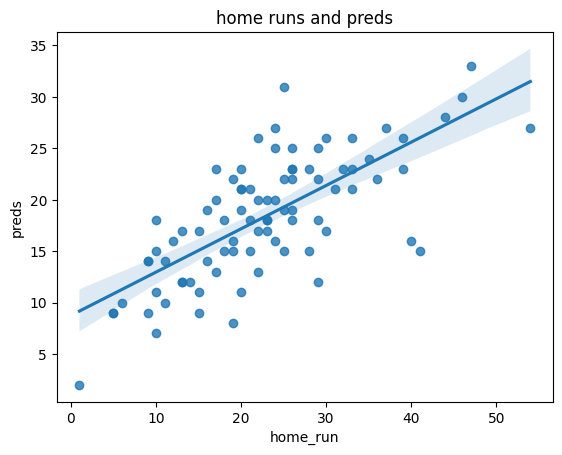

In [141]:
#visualizing the outputs
sns.regplot(data=test_data, x='home_run', y='preds')
plt.title('home runs and preds')
plt.show()

In [142]:
#table shows that the predictions aren't that bad since theyre decently on the line

final_df = test_data.loc[:, ['year', 'name', 'home_run', 'preds']]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(final_df)


     year                    name  home_run  preds
398  2023          Crawford, J.P.        19    8.0
400  2023         Renfroe, Hunter        20   23.0
402  2023       Cronenworth, Jake        10   18.0
403  2023          Ohtani, Shohei        44   28.0
405  2023         Bellinger, Cody        26   18.0
406  2023           Kim, Ha-Seong        17   13.0
407  2023          Semien, Marcus        29   18.0
408  2023    Springer III, George        21   21.0
409  2023       Yelich, Christian        19   15.0
412  2023       Goldschmidt, Paul        25   31.0
413  2023           Bregman, Alex        25   22.0
415  2023        Bogaerts, Xander        19   16.0
417  2023           Riley, Austin        37   27.0
418  2023            LeMahieu, DJ        15   11.0
419  2023        Melendez Jr., MJ        16   19.0
421  2023          Correa, Carlos        18   18.0
424  2023           Verdugo, Alex        13   12.0
425  2023          Garcia, Adolis        39   23.0
426  2023              Bohm, Al

## Final Thoughts
We find that the Linear Regression Model used isn't as strong as some other models, but we do find that it does get close with the majority of its predictions. Many of the predictions are 3-4 counts off of the true home run count.

I did have the 2020 MLB season in the model, but towards the end, I took it out due to the stats not being as good as the other models because of the pandemic and shortened MLB season. This would cause players to not hit as many home runs AND cause them to have inflated/deflated percentages due to them getting less at bats.

I also find that the regression model does do a good job getting close to the actual home run number, and the only players that it doesn't get too close with are the breakout players that people seem to say are the best players in the league. This could mean that either the hitter could've just had an outlier year, or people regard them as a great player due to recency bias.